# Generation of figure 2
Tim Tyree<br>
1.3.2022

In [1]:
from lib.my_initialization import *
from lib import *
%load_ext autoreload
%autoreload 2

import random,scipy
import matplotlib as mpl #for colorbar
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
from scipy import stats
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import warnings
warnings.simplefilter("ignore", UserWarning)
# import cupy as cp
np.random.seed(42)
# cp.random.seed(42)

In [2]:
#TODO(later): remake these plots with any a,D,r,kappa combination inside the bounds of the result of my >500 years of computation time
#HINT: interp=recall_particle_model_interp()  #estimated run time ~20 seconds
comp_mse_via_interp_unattractive


<function lib.measure.mean_squared_error.comp_mse_via_interp_unattractive(x, *args)>

In [3]:
# #recall the fit of the particle model to the powerlaw fits from the full models
# wjr=recall_powerlaw_fits_to_full_models()
# print(*wjr)

In [4]:
# # recall_particle_parameter_fits 
# a,D,r,kappa,rmse=recall_particle_parameter_fits('luorudy')
# a,D,r,kappa,rmse=recall_particle_parameter_fits('fentonkarma')
# a_hat_FK, D_hat_FK, a_hat_FK_long, a_hat_FK_vlong, a_hat_LR, D_hat_LR, a_hat_LR_long=recall_particle_parameter_measurements()

# load data
- DONE: directly compute the powerlaws from the particle model with vector-summed inverse powerlaw attraction
- Nota Bene: this process is automated by my pythonic function recall_particle_model_interp from lib

In [5]:
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_17_all_powerlaw_fits.csv"
input_fn=f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_15_all_powerlaw_fits.csv"
df=pd.read_csv(input_fn)
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,D,varkappa,x0,L,force_code,neighbor,reflect,set_second,no_repulsion,no_attraction
0,1.477497,0.017889,10.233038,0.458553,0.996691,0.254568,2.192560,fk_ncbc,0.1,1.0,...,1.6,9,0,10,2,0,0,0,0,0
1,1.726534,0.013938,18.451423,0.663628,0.998526,0.252599,0.849591,lr_pbc,0.1,1.0,...,1.0,9,0,10,2,0,1,0,0,0
2,1.361442,0.010685,34.324471,1.345462,0.998607,0.557511,10.602247,lr_pbc,0.1,1.0,...,1.2,90,0,10,2,0,1,0,0,0
3,3.050656,0.082928,110.878921,27.313205,0.983541,8.696932,40.571684,lr_pbc,0.1,1.0,...,1.6,1,0,10,2,0,0,0,0,0
4,1.961670,0.014691,3.008488,0.072870,0.998732,0.053220,1.228204,fk_pbc,0.1,1.0,...,1.9,1,0,10,2,0,0,0,0,0


In [6]:
r=0.1
kappa=500#250
D=0.7
# varkappa_lst=sorted(set(df['varkappa'].values))
# varkappa_lst

#TODO: extract xy values for kappa, r, D fixed to any value, which I can change later
#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
# kappa=100
L=10

#template query for the DataFrame
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
query&=df.r==r
query&=df.kappa==kappa
query&=df.D==D
query&=df.L==L
# query&=df.x0==x0
query_template=query.copy()

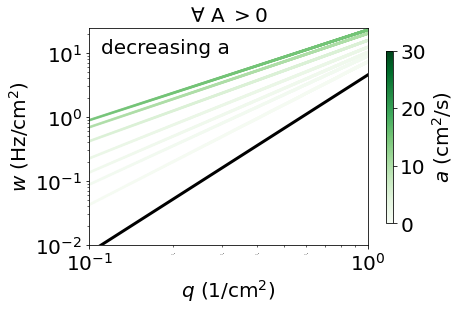

In [7]:
num_points = 25
c_col = 'rmse_full'
vmin = 0.
vmax = .25
fontsize = 20
x1lim = [1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
fig, ax = plt.subplots(figsize=(5,4))
varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([0,1,2,3, 5, 10, 20, 30]))

vmin = 0
vmax = np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values

    #scatter plot
    if varkappa==0:
        ax.plot(x_values,y_values,c='black',alpha=1.,lw=3)#,s=5)
        first_case=False
    else:
        ax.scatter(x_values,y_values,
               c=c_values,cmap='Greens',alpha=0.7,s=3,vmin=vmin,vmax=2*vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$q$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
           x2label=r'$w$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
           title=None,
           fontsize=fontsize,
           use_loglog=True)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.Greens
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

ax.annotate("decreasing a", xy=(0.3, 11), xytext=(0.11, 10),fontsize=fontsize)
ax.set_title(r'$\forall $ A $ > 0$',fontsize=fontsize)
# ax.set_title(r'For all A $ > 0$',fontsize=fontsize)
plt.show()

__dependence of M on a__

src 'generate figure effect of increasing a.ipynb':
- for D=0.7, kappa=250, r=0.1 fixed,
- the powerlaw OLS fit for loglog of M versus a
- m=0.34662844685683697
- Delta_m=0.007544034420649642
- b=1.5430792099954873
- Delta_b=0.023831286783598894
- Rsquared=0.9972947153026107

#  DONE: generate Fig. 2C individually

In [8]:
#load birth death rates from the full model
data_folder=f'{nb_dir}/data'
os.chdir(data_folder)

data_fk_fn='full_results/data_fig4_vidmar_fk_tt.csv'
data_lr_fn='full_results/data_fig4_vidmar_lr_tt.csv'

fk=pd.read_csv(data_fk_fn)
fk['N']=fk['No2']*2
fk['q']=fk['N']/fk['A'] #number of tips per square centimeter
fk['w']=fk['rate']/fk['A']*10**3 #Hz/cm^2

lr=pd.read_csv(data_lr_fn)
lr['N']=lr['No2']*2
lr['q']=lr['N']/lr['A'] #number of tips per square centimeter
lr['w']=lr['rate']/lr['A']*10**3 #Hz/cm^2

In [9]:
#DONT: dev PlotScatter function for the full models
#input: ax, df=lr or fk, c='C0' or 'C1'
#output: True and plotted values
mpl.rcParams.update(matplotlib.rcParamsDefault)


In [10]:
import matplotlib.pyplot as plt, numpy as np
from mpltools import annotation

annotation.slope_marker?

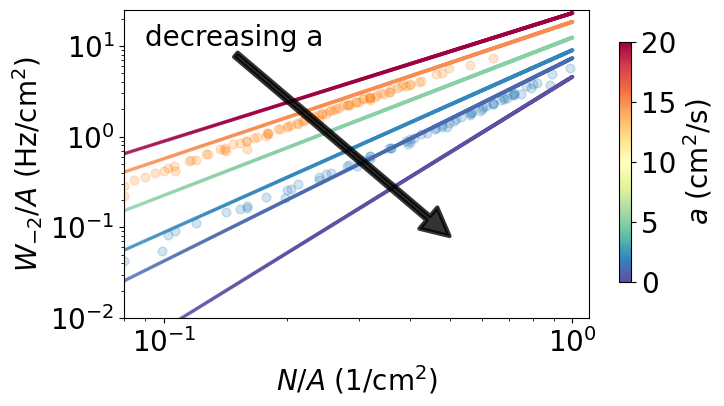

In [11]:
cmap = 'Spectral' + '_r'
num_points = 25
c_col = 'rmse_full'
fontsize = 20
xytext = (0.09, 10)
x1lim = [8e-2, 1.1]  #[1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
figsize = (6, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)

# #plot the particle models
# varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([0, 1, 2, 5, 15, 30]))
# varkappa_lst = list(reversed([0,1,2,3, 5, 10, 20, 30]))

vmin = 0
vmax = 20  #np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled from cache
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values
    #plot
    ax.scatter(x_values,
               y_values,
               c=c_values,
               cmap=cmap,
               alpha=0.6,
               s=3,
               vmin=vmin,
               vmax=vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(
    ax,
    x1lim=x1lim,
    x2lim=x2lim,
    x1label=r'$N/A$ (1/cm$^{2}$)',  #q$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
    x2label=
    r'$W_{-2}/A$ (Hz/cm$^{2}$)',  #w$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
    title=None,
    fontsize=fontsize,
    use_loglog=True)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap_obj = mpl.cm.get_cmap(cmap)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap_obj,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

#plot the full models
ax.scatter(fk['q'].values,
           fk['w'].values,
           c='C0',
           alpha=0.2,
           s=40,
           label='Fenton-Karma',
           zorder=0)
ax.scatter(lr['q'].values,
           lr['w'].values,
           c='C1',
           alpha=0.2,
           s=40,
           label='Luo-Rudy',
           zorder=0)

#plot arrow annotation
ax.annotate("decreasing a", xy=(0.3, 11), xytext=xytext, fontsize=fontsize)
ax.annotate(
    "",
    xy=(0.5, 0.08),
    xytext=(0.15, 8),  #,zorder=-1e8,#zorder can send to back
    arrowprops=dict(lw=3, headwidth=20., headlength=20., color='k',
                    alpha=0.8))  #arrowstyle="->",

#TODO: add dashed-black line below a=0 with slope of exactly two
# #TODO: mark the slope of ^that line with ~2
# x1 = 0.09
# y1 = 2
# annotation.slope_marker(origin=(x1, y1),
#                         slope=2,
#                         text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
#                         poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},#TODO: replace with purple
#                         ax=ax)
# #DONE: mark the slope of ^that line with ~3
# x1 = 0.6
# y1 = 0.3
# annotation.slope_marker(origin=(x1, y1),
#                         slope=3,#(3, 1),
#                         text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
#                         poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},#TODO: replace with purple
#                         ax=ax)

# # #DONE: test whether this slope is correct with a scatter plot of 2 points
# # x2 = 0.7
# # y2 = y1 * (x2 / x1)**3
# # ax.scatter([x1,x2],[y1,y2],marker='^',c='r',s=100,zorder=-1)
# # #DONT: if not, dev my own custom loglog slope plotter
# leg = ax.legend(loc='lower right', fontsize=fontsize - 6)
# for lh in leg.legendHandles:
#     lh.set_alpha(1)
plt.show()

In [12]:
print(f"Notes on Fig. 2")
print(f"kappa={kappa} Hz, r = {r} cm, D={D} cm^2/s, fixed.")
print(f"in order to make the particle model line up better with the FK model, I'll need to change r to 0.8 or 0.6 cm...")
print(f"^this would require a bit of coding, to use interp instead of df...")

Notes on Fig. 2
kappa=500 Hz, r = 0.1 cm, D=0.7 cm^2/s, fixed.
in order to make the particle model line up better with the FK model, I'll need to change r to 0.8 or 0.6 cm...
^this would require a bit of coding, to use interp instead of df...


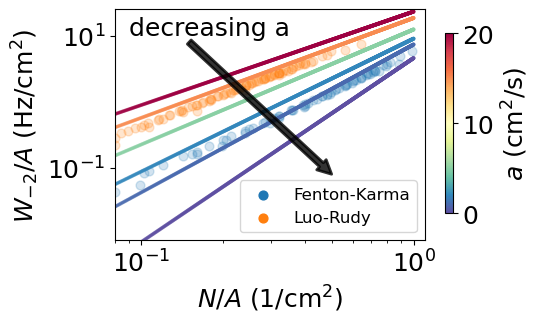

In [13]:
cmap='Spectral'+'_r'
num_points = 25
c_col = 'rmse_full'
fontsize = 18
xytext=(0.09, 10)
x1lim = [8e-2, 1.1]#[1e-1, 1]
x2lim = [8e-3, 25]
# x2lim = [4e-3, 25]
# x1lim=[5,10]
# x2lim=[50,350]
figsize=(4,3)#(5,4)
fig, ax = plt.subplots(figsize=figsize)

# #plot the particle models
# varkappa_lst = sorted(set(df['varkappa'].values))
varkappa_lst = list(reversed([0, 1, 2, 5, 15, 30]))
# varkappa_lst = list(reversed([0,1,2,3, 5, 10, 20, 30]))
vmin = 0
vmax = 20#np.max(varkappa_lst)
for varkappa in varkappa_lst:
    #extract the data
    query = query_template.copy()
    query &= df.varkappa == varkappa
    M_returned = df.loc[query, 'M'].values
    nu_returned = df.loc[query, 'm'].values
    #     print((M_returned.shape,nu_returned.shape))  #shows there is a unique fit recalled from cache
    M = M_returned[0]
    nu = nu_returned[0]
    x_values = np.linspace(0, 1, 1000)
    y_values = M * x_values**nu
    c_values = varkappa + 0. * x_values
    #plot 
    ax.scatter(x_values,y_values,
               c=c_values,cmap=cmap,alpha=0.6,s=3,vmin=vmin,vmax=vmax)
# title=f'Top {num_points} Trials for {modelname} Model\n'
FormatAxes(ax,
           x1lim=x1lim,
           x2lim=x2lim,
           x1label=r'$N/A$ (1/cm$^{2}$)',#q$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
           x2label=r'$W_{-2}/A$ (Hz/cm$^{2}$)',#w$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
           title=None,
           fontsize=fontsize,
           use_loglog=True)
# cbar=fig.colorbar(cmap='bone', ax=ax, shrink=0.6,label=r'RMSE$_{particle\;vs\;full}$')#, location='top'
# fig.colorbar(pcm, ax=[axs[0, col]], location='top', shrink=0.6)
#     cbar=fig.colorbar(pcm, ax=axs[:, col],shrink=0.6)#,label=output_col)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap_obj = mpl.cm.get_cmap(cmap)
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax,
                               cmap=cmap_obj,
                               norm=norm,
                               spacing='proportional')
cb.set_label(r'$a$ (cm$^{2}/$s)', fontsize=fontsize)
cb.ax.tick_params(labelsize=fontsize)

#plot the full models
ax.scatter(fk['q'].values,fk['w'].values,c='C0',alpha=0.2,s=40,label='Fenton-Karma',zorder=0)
ax.scatter(lr['q'].values,lr['w'].values,c='C1',alpha=0.2,s=40,label='Luo-Rudy',zorder=0)

#plot arrow annotation
ax.annotate("decreasing a", xy=(0.3, 11), xytext=xytext,fontsize=fontsize)
ax.annotate("", xy=(0.5, 0.08), xytext=(0.15, 8),#,zorder=-1e8,#zorder can send to back
            arrowprops=dict(lw=2,headwidth=10.,headlength=10.,color='k',alpha=0.8))#arrowstyle="->",

leg=ax.legend(loc='lower right',fontsize=fontsize-6)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()
#TODO: lower fontsize in the yticksllabels only

In [14]:
# matplotlib.colors.get_named_colors_mapping()

In [15]:
#DONE(easy): plot the original full model annihilation rate measurements
#DONE: find previous "decreasing a" plot NOT from 'Generating Annihilation Rate Plots from Remote Cache of Particle Model.ipynb'
#TODO: merge ^those
#TODO: perform basic edits to match sketch

# DONE: generate Fig. 2A  individually
- for 2A as the best fits to the particle models (blue) FK and (orange) LR.
    - try showing loglog fit first
- for 2B as the residuals with (dashed) a=0 and (solid) a>0 for both of the full models?

In [16]:
#recall results from tables in the main mansucript
wjr=recall_powerlaw_fits_to_full_models()
interp=recall_particle_model_interp()
a_hat_FK, D_hat_FK, a_hat_FK_long, a_hat_FK_vlong, a_hat_LR, D_hat_LR, a_hat_LR_long=recall_particle_parameter_measurements()

estimated runtime is ~20 seconds for 17988 training samples...
number of training examples is 17988....
training complete!


In [17]:
a=a_hat_FK_vlong;D=D_hat_FK#,wjr=wjr,interp=interp,ax=ax,
model_name='fk_pbc'#;c='C0'
#compute annihilation rates fit to the LR model
nu_full=wjr[model_name]['m']
M_full=wjr[model_name]['M']
q_values=np.linspace(0,1,20)
w_values=M_full*q_values**nu_full
args=a,D,q_values,w_values,interp

if model_name=='lr_pbc':
    model_name_string='Luo-Rudy'
elif model_name=='fk_pbc':
    model_name_string='Fenton-Karma'
else:
    model_name_string='??'

#find a best r,kappa pair for a given a,D pair for a given full model
# args=a,D,q_values,w_values,interp
bnds = ((1e-3, 2), (1e2, 1e4))
x0 = (0.1, 500)
# res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
mse=comp_mse_via_interp(res.x, *args)
rmse=np.sqrt(mse)

#compute the resulting annihilation rates
r=res.x[0]
kappa=res.x[1]
X=np.array([[r,kappa,a,D]])
yhat = interp(X)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu

q_values_fk=q_values.copy()
what_values_fk=what_values.copy()
print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse} (FK)")
dict_fk=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

a=1.604153, D=0.365238, r=0.06045948522530842, kappa=495.2658318951493, rmse=0.006797222653889483 (FK)


In [18]:
a=a_hat_LR;D=D_hat_LR#,wjr=wjr,interp=interp,ax=ax,
model_name='lr_pbc'#;c='C1'
#compute annihilation rates fit to the LR model
nu_full=wjr[model_name]['m']
M_full=wjr[model_name]['M']
q_values=np.linspace(0,1,20)
w_values=M_full*q_values**nu_full

if model_name=='lr_pbc':
    model_name_string='Luo-Rudy'
elif model_name=='fk_pbc':
    model_name_string='Fenton-Karma'
else:
    model_name_string='??'

#find a best r,kappa pair for a given a,D pair for a given full model
args=a,D,q_values,w_values,interp
bnds = ((1e-3, 2), (1e2, 1e4))
x0 = (0.1, 500)
# res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
mse=comp_mse_via_interp(res.x, *args)
rmse=np.sqrt(mse)

#compute the resulting annihilation rates
r=res.x[0]
kappa=res.x[1]
X=np.array([[r,kappa,a,D]])
yhat = interp(X)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu

q_values_lr=q_values.copy()
what_values_lr=what_values.copy()
print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse} (LR)")
dict_lr=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

a=8.595, D=0.586055, r=0.10413888309470609, kappa=559.500160485693, rmse=0.028075538795257697 (LR)


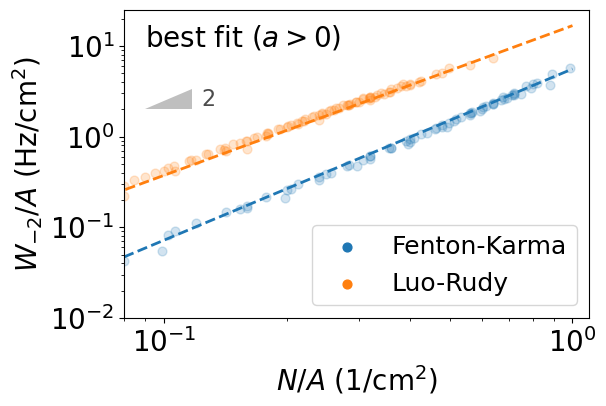

In [19]:
#plot the best fits when a>0
fontsize = 20
x1lim = [8e-2, 1.1]  #[1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
figsize = (6, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)

#plot the full models
ax.scatter(fk['q'].values,fk['w'].values,c='C0',alpha=0.2,s=40,label='Fenton-Karma',zorder=0)
ax.scatter(lr['q'].values,lr['w'].values,c='C1',alpha=0.2,s=40,label='Luo-Rudy',zorder=0)

#plot the result over the original annihilation rates
plt.plot(q_values_fk,what_values_fk,'--',c='C0',label=f'_Fit to FK',alpha=1,lw=2)
plt.plot(q_values_lr,what_values_lr,'--',c='C1',label=f'_Fit to LR',alpha=1,lw=2)

#format
FormatAxes(
    ax,
    x1lim=x1lim,
    x2lim=x2lim,
    x1label=r'$N/A$ (1/cm$^{2}$)',  #q$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
    x2label=
    r'$W_{-2}/A$ (Hz/cm$^{2}$)',  #w$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
    title=None,
    fontsize=fontsize,
    use_loglog=True)
ax.annotate(r"best fit ($a>0$)", xy=(0.3, 11), xytext=xytext,fontsize=fontsize)
leg=ax.legend(loc='lower right',fontsize=fontsize-2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
#mark the slope of ^that line with ~2
x1 = 0.09
y1 = 2
annotation.slope_marker(origin=(x1, y1),
                        slope=2,
                        text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
                        poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},#TODO: replace with purple
                        ax=ax)
# #mark the slope of ^that line with ~3
# x1 = 0.6
# y1 = 0.3
# annotation.slope_marker(origin=(x1, y1),
#                         slope=3,#(3, 1),
#                         text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
#                         poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},#TODO: replace with purple
#                         ax=ax)

plt.show()

# TODO: generate Fig. 2B individually
- for 2B as the best fits to the particle models (blue) FK and (orange) LR when a=0
- for 2B as the residuals with (dashed) a=0 and (solid) a>0 for both of the full models?

In [21]:
#is a=2D in the annihilation rate fits?

In [112]:
recall_particle_model_interp_unattractive

<function lib.model.particle_model_annihilation_rates.recall_particle_model_interp_unattractive(reflect=0, force_code=2, set_second=0, no_attraction=0, no_repulsion=0, L=10, testing=False, printing=True, mode='vectorsummed', input_fn_dict=None, **kwargs)>

In [113]:
#DONE: see here if any df from pd.read_csv(input_fn) has powerlaws for the a=0 case
#DONE: try a bunch of run_num
# run_num=15 #worked (N=186)
run_num=20 #worked? (N=?)
input_fn= f"/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_all_powerlaw_fits.csv"
input_fn_dict={'vectorsummed':input_fn,'neighboronly':input_fn}

#recall results from tables in the main mansucript
wjr=recall_powerlaw_fits_to_full_models()
a_hat_FK, D_hat_FK, a_hat_FK_long, a_hat_FK_vlong, a_hat_LR, D_hat_LR, a_hat_LR_long=recall_particle_parameter_measurements()

In [115]:
#DONE: root cause analysis on why broken: recall_particle_model_interp_unattractive. answer mode='neighboronly' for run 20...
interp_unattractive=recall_particle_model_interp_unattractive(input_fn_dict=input_fn_dict,mode='neighboronly',printing=True,testing=True)

estimated runtime is ~140 seconds for 17988 training samples...
number of training examples is 4017....
training complete!
shape of X (4017, 3) --> shape of y=yhat (4017, 2)
Example Usage:
yhat=interp(X)
the rmse of simple interpolation is 0.0000


In [120]:
# #recall fits from lib
# # a,D,r,kappa,rmse=recall_particle_parameter_fits('luorudy')
# # print(f"a={a},    D={D}, r={r}, kappa={kappa},  rmse={rmse}")
# a,D,r,kappa,rmse=recall_particle_parameter_fits('fentonkarma')
# # print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse}")

# D=D_hat_FK
# kappa=500
# r=0.3#needed because the smaller r values havent' finished yet...
# a=0

In [121]:
#TODO: try dev function from ['r','kappa','D'] to mse, as before
#TODO: modify old routine for multidimensional optimization to here
#TODO: generate fig. 2B
#TODO: update drive
#TODO: see if a particle fit works when a=2D

In [136]:
model_name='fk_pbc'
D=D_hat_FK
kappa=500
r=0.3#needed because the smaller r values havent' finished yet...
a=0

#compute annihilation rates fit to the LR model
nu_full=wjr[model_name]['m']
M_full=wjr[model_name]['M']
q_values=np.linspace(0,1,20)
w_values=M_full*q_values**nu_full
args=q_values,w_values,interp_unattractive

if model_name=='lr_pbc':
    model_name_string='Luo-Rudy'
elif model_name=='fk_pbc':
    model_name_string='Fenton-Karma'
else:
    model_name_string='??'

#find a best r,kappa pair for a given a,D pair for a given full model
# args=a,D,q_values,w_values,interp
bnds = ((0.3, 0.5), (250, 1500),(0.1,8.))
# x0 = (r,kappa,D)
x0 = (0.3,kappa,D)

res = minimize(comp_mse_via_interp_unattractive, x0, args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
mse=comp_mse_via_interp_unattractive(res.x, *args)
rmse=np.sqrt(mse)

#compute the resulting annihilation rates
a=0
r=res.x[0]
kappa=res.x[1]
D=res.x[2]
X=np.array([[r,kappa,D]])
yhat = interp(X)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu

q_values_fk=q_values.copy()
what_values_fk=what_values.copy()
print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse} (FK)")
dict_fk_unattractive=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

a=0, D=0.6006135999999994, r=0.3, kappa=250.0, rmse=10.275429161876001 (FK)


In [137]:
model_name='lr_pbc'
D=D_hat_LR
kappa=500
r=0.3#needed because the smaller r values havent' finished yet...
a=0

#compute annihilation rates fit to the LR model
nu_full=wjr[model_name]['m']
M_full=wjr[model_name]['M']
q_values=np.linspace(0,1,20)
w_values=M_full*q_values**nu_full
args=q_values,w_values,interp_unattractive

if model_name=='lr_pbc':
    model_name_string='Luo-Rudy'
elif model_name=='fk_pbc':
    model_name_string='Fenton-Karma'
else:
    model_name_string='??'

#find a best r,kappa pair for a given a,D pair for a given full model
# args=a,D,q_values,w_values,interp
bnds = ((0.3, 0.5), (250, 1500),(0.1,8.))
# x0 = (r,kappa,D)
x0 = (0.3,kappa,D)

res = minimize(comp_mse_via_interp_unattractive, x0, args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
mse=comp_mse_via_interp_unattractive(res.x, *args)
rmse=np.sqrt(mse)

# #compute the resulting annihilation rates
# a=0
# r=res.x[0]
# kappa=res.x[1]
# X=np.array([[r,kappa,D]])
# yhat = interp(X)
# nu=yhat[0,0]
# M=yhat[0,1]
# what_values=M*q_values**nu

# q_values_fk=q_values.copy()
# what_values_fk=what_values.copy()
# print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse} (FK)")
# dict_fk_unattractive=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)


#compute the resulting annihilation rates
r=res.x[0]
kappa=res.x[1]
D=res.x[2]
X=np.array([[r,kappa,D]])
yhat = interp(X)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu

q_values_lr=q_values.copy()
what_values_lr=what_values.copy()
print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse} (LR)")
dict_lr_unattractive=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

a=0, D=0.6997745949900251, r=0.3, kappa=250.0, rmse=5.371661364107509 (LR)


In [130]:
#DONE: simplify ^that
#DONE: repeat ^that for LR
#TODO: generate plot
#TODO: update!

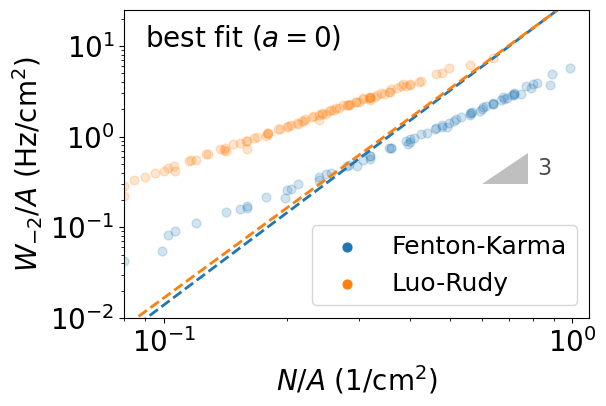

In [139]:
#plot the best fits when a>0
fontsize = 20
x1lim = [8e-2, 1.1]  #[1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
figsize = (6, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)

#plot the full models
ax.scatter(fk['q'].values,fk['w'].values,c='C0',alpha=0.2,s=40,label='Fenton-Karma',zorder=0)
ax.scatter(lr['q'].values,lr['w'].values,c='C1',alpha=0.2,s=40,label='Luo-Rudy',zorder=0)

#plot the result over the original annihilation rates
plt.plot(q_values_fk,what_values_fk,'--',c='C0',label=f'_Fit to FK',alpha=1,lw=2)
plt.plot(q_values_lr,what_values_lr,'--',c='C1',label=f'_Fit to LR',alpha=1,lw=2)

#format
FormatAxes(
    ax,
    x1lim=x1lim,
    x2lim=x2lim,
    x1label=r'$N/A$ (1/cm$^{2}$)',  #q$ (1/cm$^{2}$)',#r'$q=N/A$ (1/cm$^{2}$)',
    x2label=
    r'$W_{-2}/A$ (Hz/cm$^{2}$)',  #w$ (Hz/cm$^{2}$)',#r'$w=W_{-2}/A$ (Hz/cm$^{2}$)',
    title=None,
    fontsize=fontsize,
    use_loglog=True)
ax.annotate(r"best fit ($a=0$)", xy=(0.3, 11), xytext=xytext,fontsize=fontsize)
leg=ax.legend(loc='lower right',fontsize=fontsize-2)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
# #mark the slope of ^that line with ~2
# x1 = 0.09
# y1 = 2
# annotation.slope_marker(origin=(x1, y1),
#                         slope=2,
#                         text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
#                         poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},#TODO: replace with purple
#                         ax=ax)
#mark the slope of ^that line with ~3
x1 = 0.6
y1 = 0.3
annotation.slope_marker(origin=(x1, y1),
                        slope=3,#(3, 1),
                        text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
                        poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},#TODO: replace with purple
                        ax=ax)

plt.show()

## scratchwerk

In [ ]:
print("(FK):")
a=a_hat_FK_vlong
D=D_hat_FK#,wjr=wjr,interp=interp,ax=ax,
model_name='fk_pbc'#;c='C0'
# a=a_hat_LR;D=D_hat_LR#,wjr=wjr,interp=interp,ax=ax,
# model_name='lr_pbc'#;c='C1'
#compute annihilation rates fit to the LR model
nu_full=wjr[model_name]['m']
M_full=wjr[model_name]['M']
q_values=np.linspace(0,20)
w_values=M_full*q_values**nu_full

if model_name=='lr_pbc':
    model_name_string='Luo-Rudy'
elif model_name=='fk_pbc':
    model_name_string='Fenton-Karma'
else:
    model_name_string='??'


#set attraction coefficient to zero
a=0
    
#find a best r,kappa pair for a given a,D pair for a given full model
args=a,D,q_values,w_values,interp
bnds = ((1e-3, 2), (1e2, 1e4))
x0 = (0.1, 500)
# res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
mse=comp_mse_via_interp(res.x, *args)
rmse=np.sqrt(mse)


#compute the resulting annihilation rates
r=res.x[0]
kappa=res.x[1]
X=np.array([[r,kappa,a,D]])
yhat = interp(X)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu

q_values_fk=q_values.copy()
what_values_fk=what_values.copy()

#TODO: initialize changing parameters
print(f"initializing parameters to:")
print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse}")
a0=float(a); D0=float(D); r0=float(r); kappa0=float(kappa);rmse0=float(rmse)
# dict_fk=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

In [ ]:
#CONFIRMED: setting a=0 causes interp to become nan
#NOTE: ^this is consistent with my prior observation of a weird jump at a=0
#TODO: dev function that returns interp (r,kappa,D) conditioned on a=0

In [ ]:
# interp=

In [ ]:
#TODO: get interp working using an earlier example with the perturbation
X=np.array([[r0,kappa0,a0,D0]])
yhat = interp(X)
print(yhat)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu
#TODO: get interp working using an earlier example
# comp_rmse_via_interp
#TODO: show interp works for a perturbation
#TODO: make an array of guesses for interp
#TODO: compute the rmse for each
#TODO: return the smallest such parameter setting

In [ ]:
interp(np.array([[r,kappa,a,D],[r,kappa,a,D]]).T)

In [ ]:
#initialize repeatably
a=float(a0); D=float(D0); r=float(r0); kappa=float(kappa0); rmse0=float(rmse)

In [ ]:
def perform_perturbation_D(a,D,r,kappa,dx):
    D*=(1+dx)
    return a,D,r,kappa
def perform_perturbation_r(a,D,r,kappa,dx):
    r*=(1+dx)
    return a,D,r,kappa
def perform_perturbation_kappa(a,D,r,kappa,dx):
    kappa*=(1+dx)
    return a,D,r,kappa

In [ ]:
q_values.shape,w_values.shape

In [ ]:
#option A: the high level approach
#DONE: make map from scalar r perturbation to mse
def fun_r(dx,a,D,r,kappa,q_values,w_values,interp):
    #perturb one parameter by a factor of 1+dx 
    a,D,r,kappa=perform_perturbation_r(a,D,r,kappa,dx)
    args=a,D,q_values,w_values,interp
    #compute loss function
    x=r,kappa
    argsp=a,D,q_values,w_values,interp
    mse=comp_mse_via_interp(x, *argsp)
    return mse

In [ ]:
perform_perturbation_r(a,D,r,kappa,dx),perform_perturbation_r(a,D,r,kappa,dx+1)

In [ ]:
def comp_mse_via_interp_simple(r,kappa,a,D,q_values,w_values,interp):
    '''compute the mean squared error from the xy values, q_values,w_values.
    the model uses the powerlaw fit returned by yhat = interp(np.array([[r,kappa,a,D]]))
    '''
    #interpolate nu and M using interp
    X=np.array([[r,kappa,a,D]])
    yhat = interp(X)
    nu=yhat[0,0]
    M=yhat[0,1]
    what_values=M*q_values**nu
    mse=np.mean((what_values-w_values)**2)
    return mse


In [ ]:
r,kappa,a,D,q_values,w_values,interp

In [ ]:
X=np.array([[r,kappa,a,D]])
yhat = interp(X)
nu=yhat[0,0]
M=yhat[0,1]
what_values=M*q_values**nu
mse=np.mean((what_values-w_values)**2)

In [ ]:
comp_mse_via_interp_simple(r,kappa,a,D,q_values,w_values,interp)

In [ ]:
#     a,D,r,kappa=perform_perturbation_r(a,D,r,kappa,dx)
#     args=a,D,q_values,w_values,interp
#compute loss function
x=r,kappa
argsp=a,D,q_values,w_values,interp
mse=comp_mse_via_interp(x, *argsp)
mse

In [ ]:
dx=1
fun_r(dx,a,D,r,kappa,q_values,w_values,interp)

In [ ]:
# can i iterate on an object of class returned by minimize?
# minimize?
trgt_parameter='r'
args=a,D,q_values,w_values,interp
fun=comp_fun_1D(res,args,trgt_parameter)
res_next=minimize_scalar(
    fun,
    bracket=None,
    bounds=None,
    args=args,
    method='brent',
    tol=None,
    options=None,
)

In [ ]:
#TODO: optimize r wrt mse

In [ ]:

#TODO: repeat ^that for any other desired parameters
#TODO: wrap ^that into a function
#TODO: iterate over ^that function 100 times
#TODO: plot the result
#TODO: increase the number of samples
#TODO: plot the result
#TODO: if the result didn't change, document, share, and go to bed.

In [ ]:
#option B: the low level approach
#TODO: perturb r
#TODO: measure change
#TODO: accept or deny

In [ ]:
#TODO: dev map from dict_res to dict_res
#map dict_res to args and the first parameter to be varied, r
#map dict_res to args and the next parameter to be varied, kappa
#map dict_res to args and the next parameter to be varied, D
#TODO: test ^that
#TODO: simply try simple 1D optimization (bounded tho)
#TODO(|failing ^that): try each available method for 1D optimization

In [ ]:
# fun=comp_fun_1D(res,args,trgt_parameter)
res_next=minimize_scalar(
    fun,
    bracket=None,
    bounds=None,
    args=(),
    method='brent',
    tol=None,
    options=None,
)

In [ ]:
# model_name='fk_pbc'#;c='C0'
# #compute annihilation rates fit to the LR model
# nu_full=wjr[model_name]['m']
# M_full=wjr[model_name]['M']
# q_values=np.linspace(0,1,20)
# w_values=M_full*q_values**nu_full
# args=a,D,q_values,w_values,interp
res.x,args

In [ ]:
r,kappa=res.x
r

In [ ]:
a_next,D_next,r_next,kappa_next=perform_perturbation_r(a,D,r,kappa,dx)

In [ ]:
trgt_parameter='r'
def fun(dx):   
    a,D,r,kappa=perform_perturbation(a,D,r,kappa,trgt_parameter)
    #compute loss function
    x=r,kappa
    argsp=a,D,q_values,w_values,interp
    mse=comp_mse_via_interp(x, *argsp)
    rmse=np.sqrt(mse)
    return mse#rmse

In [ ]:

# # define local fun to minimize in one coordinate only
# def comp_fun_1D(res,args,trgt_parameter):
#     '''run maps dx to mean squared error where dx is a change to the trgt_parameter
#     trgt_parameter is in {'a','D','r','kappa'}
#     '''
#     r,kappa=res.x
#     a,D,q_values,w_values,interp=args
#     trgt_parameter=str(trgt_parameter)

#     def fun(dx):   
#         a,D,r,kappa=perform_perturbation(a,D,r,kappa,trgt_parameter)
#         #compute loss function
#         x=r,kappa
#         argsp=a,D,q_values,w_values,interp
#         mse=comp_mse_via_interp(x, *argsp)
#         rmse=np.sqrt(mse)
#         return mse#rmse
#     return fun

In [ ]:
# can i iterate on an object of class returned by minimize?
# minimize?
trgt_parameter='r'
args=a,D,q_values,w_values,interp
fun=comp_fun_1D(res,args,trgt_parameter)
res_next=minimize_scalar(
    fun,
    bracket=None,
    bounds=None,
    args=(),
    method='brent',
    tol=None,
    options=None,
)

In [ ]:
fun(res),rmse

In [ ]:
# from scipy.optimize import minimize_scalar
# # minimize_scalar?
# method : str or callable, optional
#     Type of solver.  Should be one of:

#         - 'Brent'     :ref:`(see here) <optimize.minimize_scalar-brent>`
#         - 'Bounded'   :ref:`(see here) <optimize.minimize_scalar-bounded>`
#         - 'Golden'    :ref:`(see here) <optimize.minimize_scalar-golden>`
#         - custom - a callable object (added in version 0.14.0), see below
        
# Using the *Bounded* method, we find a local minimum with specified
# bounds as:
def f(x):
    return (x - 2) * x * (x + 2)**2
res = minimize_scalar(f, bounds=(-3, -1), method='bounded')
res.x

In [ ]:
def f(x):

#DONT: make change in a changing parameter
#DONT: wrap ^that into a function that maps paramter_state,parameter_col_change,comp_priority to parameter_state (or somethign)

In [ ]:
#TODO: make a function that tries to change each parameter by a random amount once


In [ ]:
#TODO: iterate through and perform tyree-potts refinement n_iter times from the base case 
n_iter=10

In [ ]:
# q_values_lr=q_values.copy()
# what_values_lr=what_values.copy()
# print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse} (LR)")
# dict_lr=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

In [ ]:
#DONE: copy 2A data gen
#DONE: test that ^that doesn't work
#TODO(option A): make a really simple least squares optimizer based on my "tyree-potts" optimization (randomly change one parameter, and keep if mse lowers)
#TODO(option B): root cause analysis as to why it doesn't work
#HINT: i remember trying every option in the function minimize to no avail...
#TODO: copy 2A figure gen

In [ ]:
#TODO(later): retry every option of the multidimensional minimization black box... but when q_values and w_values are strictly positive (>0)
# print("(FK):")
# a=a_hat_FK_vlong
# a=0
# D=D_hat_FK#,wjr=wjr,interp=interp,ax=ax,
# model_name='fk_pbc'#;c='C0'
# # a=a_hat_LR;D=D_hat_LR#,wjr=wjr,interp=interp,ax=ax,
# # model_name='lr_pbc'#;c='C1'
# #compute annihilation rates fit to the LR model
# nu_full=wjr[model_name]['m']
# M_full=wjr[model_name]['M']
# q_values=np.linspace(0.01,20)
# w_values=M_full*q_values**nu_full

# if model_name=='lr_pbc':
#     model_name_string='Luo-Rudy'
# elif model_name=='fk_pbc':
#     model_name_string='Fenton-Karma'
# else:
#     model_name_string='??'

# #find a best r,kappa pair for a given a,D pair for a given full model
# args=a,D,q_values,w_values,interp
# bnds = ((1e-3, 2), (1e2, 1e4))
# x0 = (0.1, 500)
# # res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
# res = minimize(comp_rmse_via_interp, (0.1, 500), args, method='Nelder-Mead', bounds=bnds,tol=1e-3)
# mse=comp_mse_via_interp(res.x, *args)
# rmse=np.sqrt(mse)

# # #set attraction coefficient to zero
# # a=0

# #compute the resulting annihilation rates
# r=res.x[0]
# kappa=res.x[1]
# X=np.array([[r,kappa,a,D]])
# yhat = interp(X)
# nu=yhat[0,0]
# M=yhat[0,1]
# what_values=M*q_values**nu

# q_values_fk=q_values.copy()
# what_values_fk=what_values.copy()

# #TODO: initialize changing parameters
# print(f"initializing parameters to:")
# print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse}")
# a0=float(a); D0=float(D); r0=float(r); kappa0=float(kappa);
# dict_fk=dict(r=r,kappa=kappa,nu=nu,M=M,rmse=rmse,res=res)

# scratchwerk

In [ ]:

fontsize = 20
x1lim = [8e-2, 1.1]  #[1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
figsize = (6, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)
#fit the particle model to the luo-rudy model
dict_out_lr=PlotParticlModelAnnihilationRateFit(a=a_hat_LR,D=D_hat_LR,wjr=wjr,interp=interp,
    ax=ax,model_name='lr_pbc',c='C1')
#fit the particle model to the fenton-karma model
dict_out_fk=PlotParticlModelAnnihilationRateFit(a=a_hat_FK_vlong,D=D_hat_FK,wjr=wjr,interp=interp,
    ax=ax,model_name='fk_pbc',c='C0')
print(f"\ndict_out_fk:")
print_dict(dict_out_fk)
print(f"dict_out_lr:")
print_dict(dict_out_lr)

In [ ]:
#TODO(option A): keep it simple, stupid!
#TODO(option B): keep it in the function
#TODO: add options to change lines from dashed to dotted
#TODO: add option for yoffset
#TODO: add option for ylabel of fit

In [ ]:
fontsize = 20
x1lim = [8e-2, 1.1]  #[1e-1, 1]
x2lim = [1e-2, 25]
# x1lim=[5,10]
# x2lim=[50,350]
figsize = (6, 4)  #(5,4)
fig, ax = plt.subplots(figsize=figsize)
#fit the particle model to the luo-rudy model
dict_out_lr=PlotParticlModelAnnihilationRateFit(a=0,D=D_hat_LR,wjr=wjr,interp=interp,
    ax=ax,model_name='lr_pbc',c='C1')
#fit the particle model to the fenton-karma model
dict_out_fk=PlotParticlModelAnnihilationRateFit(a=0,D=D_hat_FK,wjr=wjr,interp=interp,
    ax=ax,model_name='fk_pbc',c='C0')
print(f"\ndict_out_fk:")
print_dict(dict_out_fk)
print(f"dict_out_lr:")
print_dict(dict_out_lr)

In [ ]:
#TODO: fork PlotParticlModelAnnihilationRateFit into PlotParticlModelAnnihilationRateFitUnattractive and condition it on a=0 explicitely
#HINT: it'll probably be easier if I 
#TODO: copy the whole PlotParticlModelAnnihilationRateFit
#TODO: run each block separately until I get to evidence that the fit didn't work
#...

In [ ]:
#recall ^these fits from lib
a,D,r,kappa,rmse=recall_particle_parameter_fits('luorudy')
print(f"a={a},    D={D}, r={r}, kappa={kappa},  rmse={rmse}")
a,D,r,kappa,rmse=recall_particle_parameter_fits('fentonkarma')
print(f"a={a}, D={D}, r={r}, kappa={kappa}, rmse={rmse}")